In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [2]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Set the Tesla and Coca-Cola ticker symbols
tickers = ["TSLA","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

# Get 1 year's worth of historical data for Tesla and Coca-Cola
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

# Display sample data
display(prices_df.head())
display(prices_df.tail())

KO                                    TSLA  \
                            open     high    low  close   volume    open   
time                                                                       
2019-05-01 00:00:00-04:00  48.95  49.0750  48.55  48.58  8497194  239.00   
2019-05-02 00:00:00-04:00  48.53  48.7657  48.27  48.40  7045641  245.52   
2019-05-03 00:00:00-04:00  48.60  48.9600  48.52  48.72  5839237  243.86   
2019-05-06 00:00:00-04:00  48.33  48.6100  48.26  48.48  6740245  250.10   
2019-05-07 00:00:00-04:00  48.23  48.2900  47.77  48.00  8795261  256.80   

                                                                
                               high     low    close    volume  
time                                                            
2019-05-01 00:00:00-04:00  240.0000  231.50  234.010  10324457  
2019-05-02 00:00:00-04:00  247.1300  237.72  244.080  14881930  
2019-05-03 00:00:00-04:00  256.6100  243.49  255.040  21063497  
2019-05-06 00:00:00-04:00  258.3499  248.50  255.335   9546203  
2019-05-07 00:00:00-04:00  257.2100  245.10  247.060   9542822

KO                                    TSLA  \
                            open    high    low  close    volume    open   
time                                                                       
2020-04-27 00:00:00-04:00  46.00  46.975  45.71  46.77  30165738  737.61   
2020-04-28 00:00:00-04:00  47.90  48.000  46.57  46.75  31487836  795.64   
2020-04-29 00:00:00-04:00  47.27  47.860  46.88  47.11  26942872  790.17   
2020-04-30 00:00:00-04:00  47.00  47.000  45.70  45.86  32315284  855.19   
2020-05-01 00:00:00-04:00  45.62  46.390  45.21  45.61  23270044  755.00   

                                                               
                               high     low   close    volume  
time                                                           
2020-04-27 00:00:00-04:00  799.4900  735.00  798.92  58450139  
2020-04-28 00:00:00-04:00  805.0000  756.69  769.11  14526538  
2020-04-29 00:00:00-04:00  803.1999  783.16  799.84  12096180  
2020-04-30 00:00:00-04:00  869.8200  763.50  781.06  53718332  
2020-05-01 00:00:00-04:00  772.7700  683.04  701.31  31742479

In [6]:
# Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()

# Populate the `closing_prices_df` DataFrame by accessing the `close` column
# from the `prices_df` DataFrame for both KO and TSLA .
closing_prices_df["KO"] = prices_df["KO"]["close"]
closing_prices_df["TSLA"] = prices_df["TSLA"]["close"]

# Update the index for the `closing_prices_df` DataFrame
# to retain only the `date` component.
closing_prices_df.index = closing_prices_df.index.date

# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
daily_returns_df = closing_prices_df.pct_change().dropna()

# Display both the head and tail of the `daily_returns_df` DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())

,KO,TSLA
2019-05-02,-0.003705,0.043032
2019-05-03,0.006612,0.044903
2019-05-06,-0.004926,0.001157
2019-05-07,-0.009901,-0.032408
2019-05-08,-0.003125,-0.009309


,KO,TSLA
2020-04-27,0.029496,0.101959
2020-04-28,-0.000428,-0.037313
2020-04-29,0.007701,0.039955
2020-04-30,-0.026534,-0.023480
2020-05-01,-0.005451,-0.102105


In [7]:
# Generate summary statistics for the `daily_returns_df` DataFrame
daily_returns_df.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000058,0.005518
std,0.019504,0.048435
min,-0.096821,-0.185317
25%,-0.006757,-0.011358
50%,0.000192,0.004117
75%,0.006758,0.024267
max,0.063191,0.199545


<AxesSubplot:title={'center':'KO Probability Distribution'}, ylabel='Frequency'>

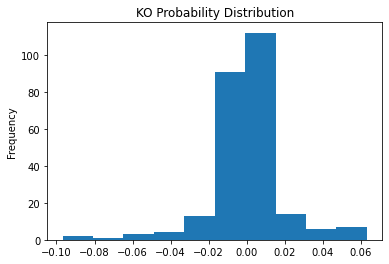

In [9]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
daily_returns_df["KO"].plot.hist(title='KO Probability Distribution')

<AxesSubplot:title={'center':'TSLA Probability Distribution'}, ylabel='Frequency'>

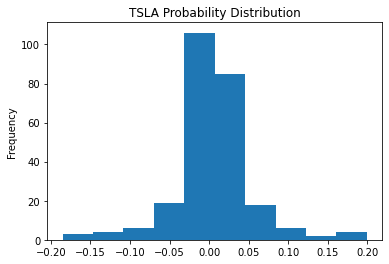

In [10]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
daily_returns_df["TSLA"].plot.hist(title='TSLA Probability Distribution')

<AxesSubplot:title={'center':'Density Plot for KO & TSLA'}, ylabel='Density'>

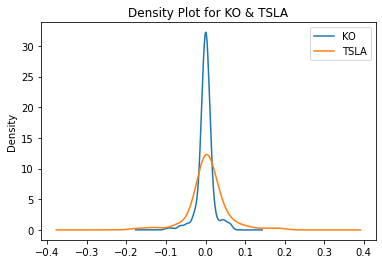

In [11]:
# Visualize the distribution of daily returns data for both KO and TSLA
# by calling the plot.density function on the daily_returns_df DataFrame.
daily_returns_df.plot.density(title='Density Plot for KO & TSLA')